# 目的

商品毎に売上が日付に左右されているのかを検証

## Import & GloalVariables

In [3]:
% matplotlib inline

import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import bokeh.plotting as bplt
from IPython.display import display, HTML
from pprintpp import pprint as pp
from sklearn import cross_validation
from sklearn.grid_search import GridSearchCV

bplt.output_notebook()

Loading BokehJS ...

In [4]:
datanames  = ['product', 'sales', 'store', 'test', 'train']
sex = ['m', 'w']
age = ['00_19', '20_49', '50_']
segments = ['m00_19', 'm20_49', 'm50_', 'w00_19', 'w20_49', 'w50_']
pids = ['p000', 'p001', 'p002', 'p003', 'p004', 'p005', 'p006', 'p007',
       'p008', 'p009', 'p010', 'p011', 'p012', 'p013', 'p014', 'p015',
       'p016', 'p017', 'p018', 'p019', 'p020', 'p021', 'p022', 'p023',
       'p024', 'p025', 'p026', 'p027', 'p028', 'p029', 'p030', 'p031',
       'p032', 'p033', 'p034', 'p035', 'p036', 'p037', 'p038', 'p039',
       'p040', 'p041', 'p042', 'p043', 'p044', 'p045', 'p046', 'p047',
       'p048', 'p049', 'p050', 'p051', 'p052', 'p053', 'p054', 'p055',
       'p056', 'p057', 'p058', 'p059', 'p060', 'p061', 'p062', 'p063',
       'p064', 'p065', 'p066', 'p067', 'p068', 'p069', 'p070', 'p071',
       'p072']
train_dates = [201506, 201507, 201508, 201509, 201510, 201511, 201512, 201601, 201602, 201603, 201604, 201605]
store_catecol = ['area', 'location']
size_dict = {'size_g': 'g', 'size_stick':'本', 'size_piece':'個', 'size_sheet':'枚'}
# 本 -> stick for index[50] , 個 -> stick for index[14, 15, 25, 37] , 枚 -> stick for index[27, 28] 
product_catecol = ['category', 'package_type', 'genre', 'manufacturer']
product_apeals = ['cal', '食物繊維', '乳酸菌', 'オリーブオイル', '砂糖', '糖類', '糖質', '食塩']
allergys= ['allergy_egg', 'allergy_wheat', 'allergy_milk', 'allergy_peanut', 'allergy_shrimp']

In [5]:
df_dict_origin = {datanames[n] : pd.read_csv('../data/{}.tsv'.format(name), delimiter='\t') for n, name in enumerate(datanames)}
df_dict = {name : df_dict_origin[name].copy() for name in df_dict_origin}

### date -> [year, month]

In [26]:
df_dict[df_n].date.astype('string')

0        201506
1        201507
2        201508
3        201509
4        201510
5        201511
6        201512
7        201601
8        201602
9        201603
10       201604
11       201605
12       201506
13       201507
14       201508
15       201509
16       201510
17       201511
18       201512
19       201601
20       201602
21       201603
22       201604
23       201605
24       201506
25       201507
26       201508
27       201509
28       201510
29       201511
          ...  
22806    201512
22807    201601
22808    201602
22809    201603
22810    201604
22811    201605
22812    201506
22813    201507
22814    201508
22815    201509
22816    201510
22817    201511
22818    201512
22819    201601
22820    201602
22821    201603
22822    201604
22823    201605
22824    201506
22825    201507
22826    201508
22827    201509
22828    201510
22829    201511
22830    201512
22831    201601
22832    201602
22833    201603
22834    201604
22835    201605
Name: date, dtype: objec

In [27]:
df_n = 'train'
col_n = 'date'
add_col = ['year', 'month']
_type = 'string'
years = []

df = df_dict[df_n]
for col in add_col:
    df[col][df[col_n].astype('string').str.contains('2015')] = 

/Users/iwasawa/penv1/lib/python2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/Users/iwasawa/penv1/lib/python2.7/site-packages/matplotlib/axes/_base.py:2767: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=201605.0, right=201605.0
  'left=%s, right=%s') % (left, right))


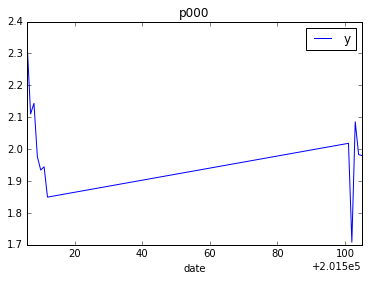

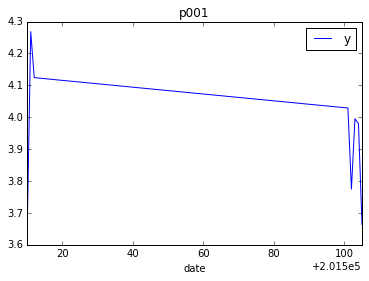

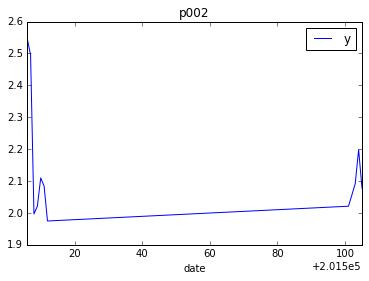

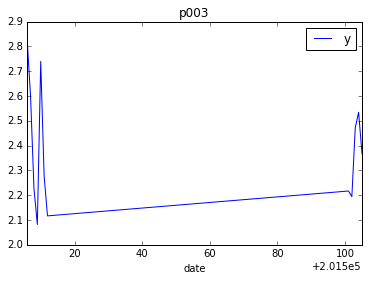

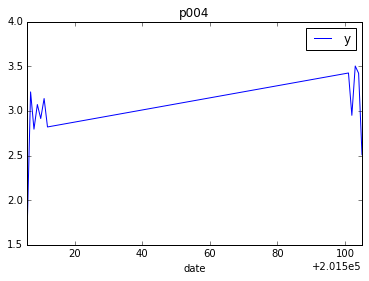

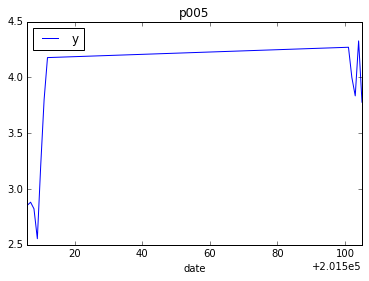

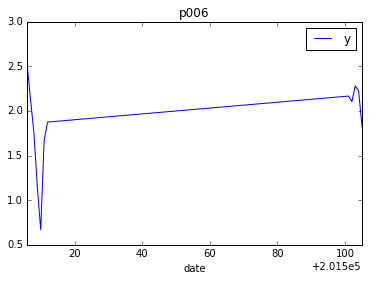

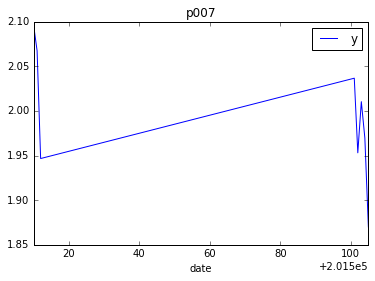

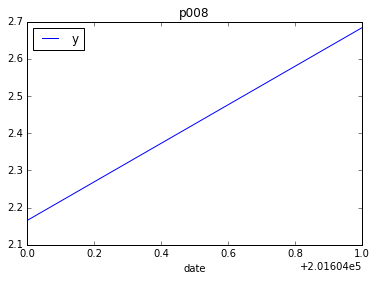

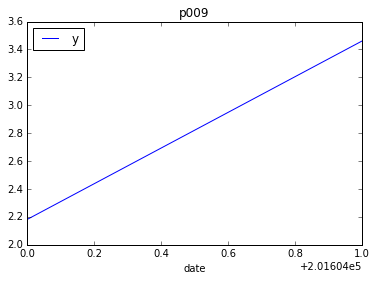

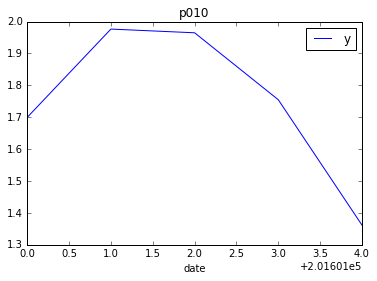

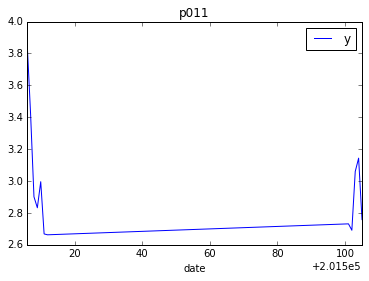

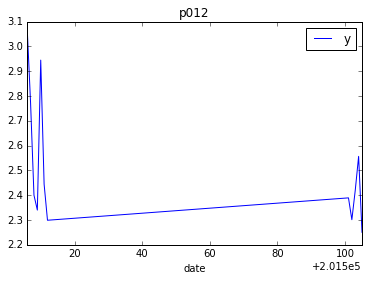

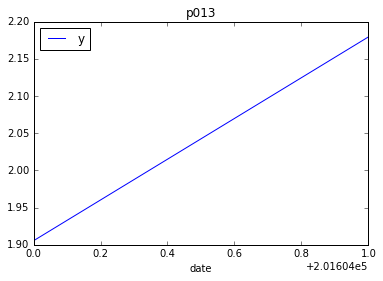

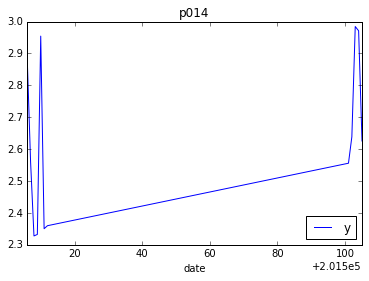

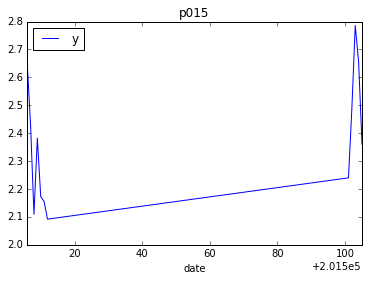

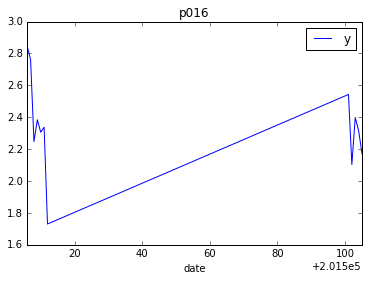

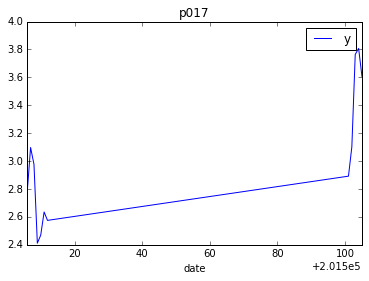

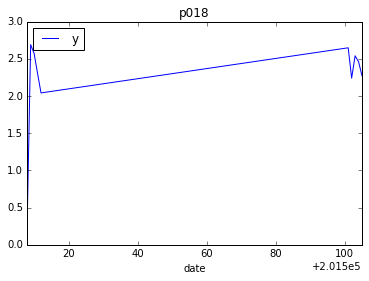

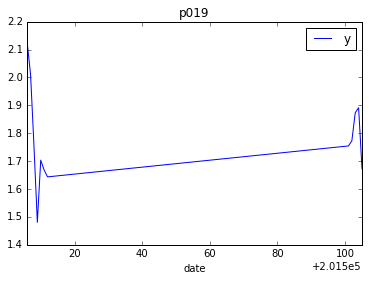

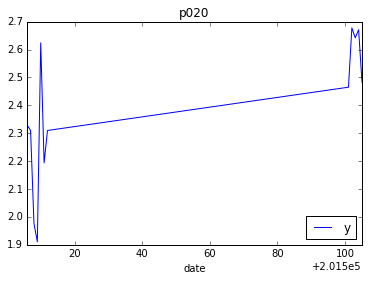

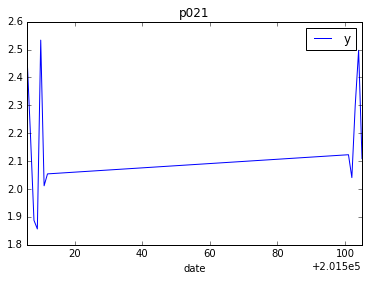

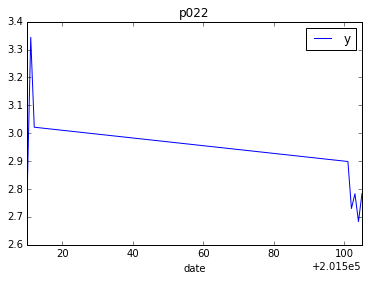

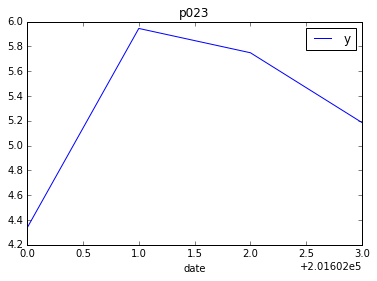

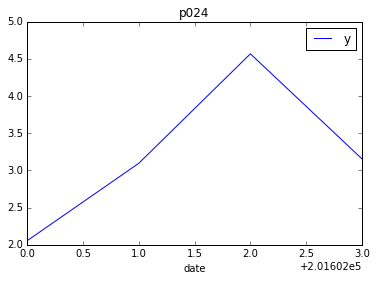

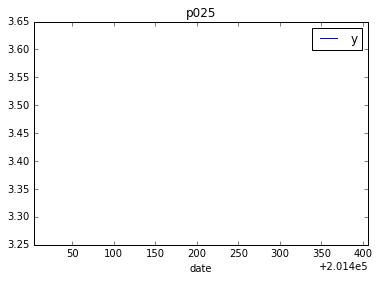

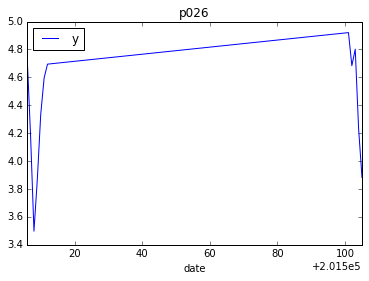

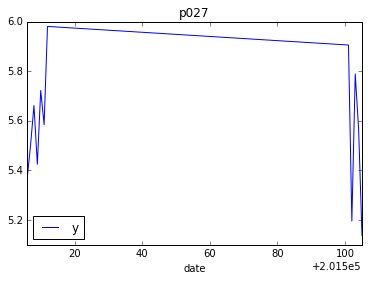

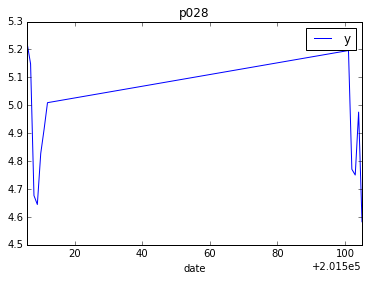

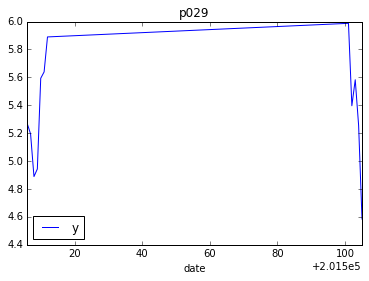

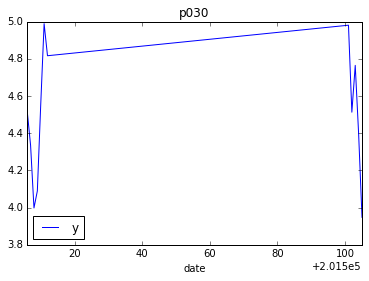

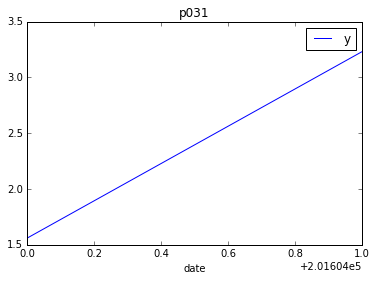

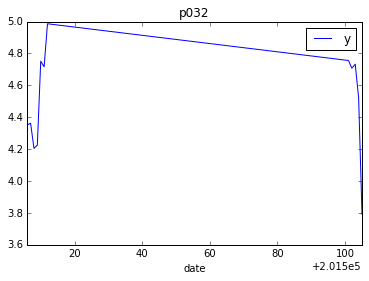

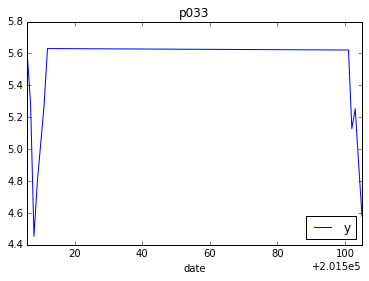

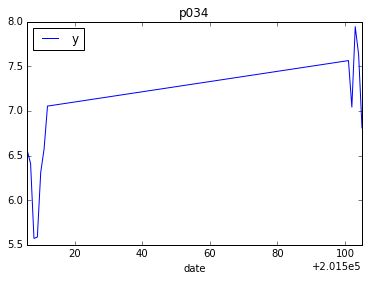

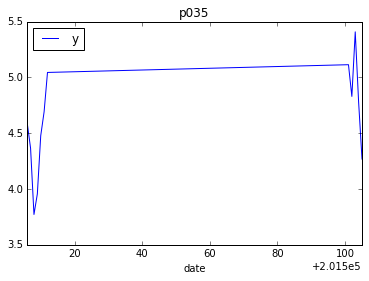

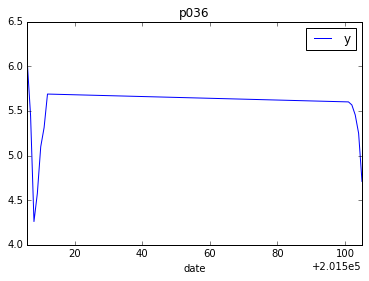

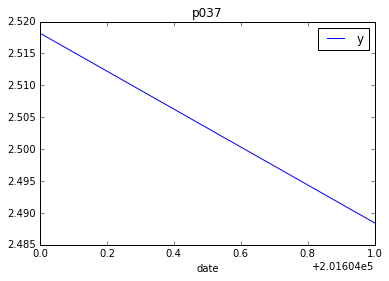

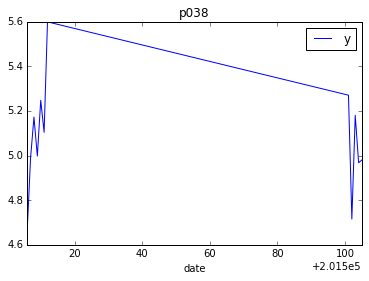

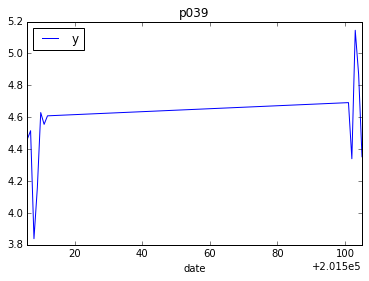

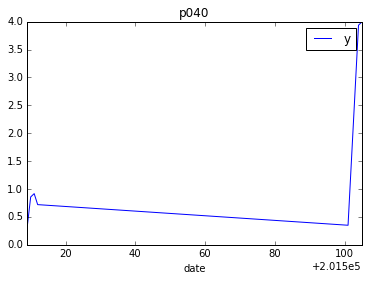

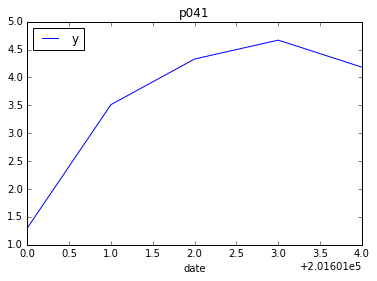

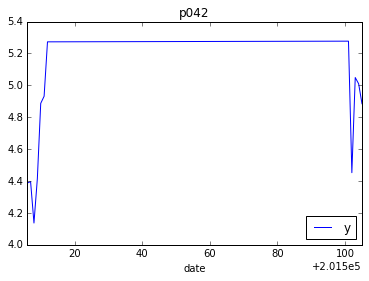

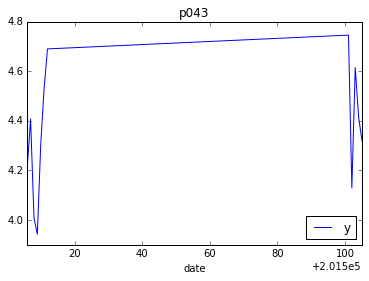

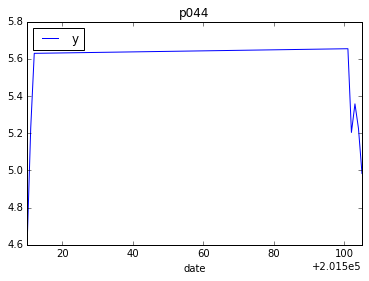

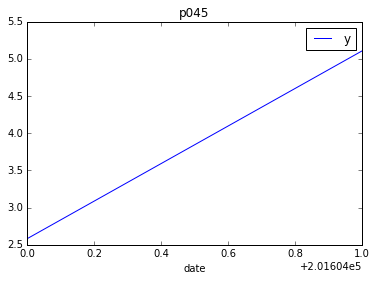

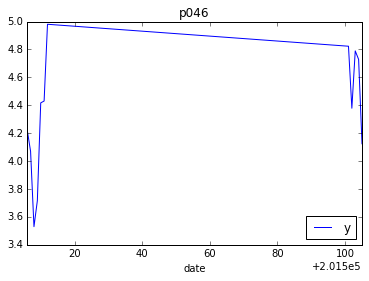

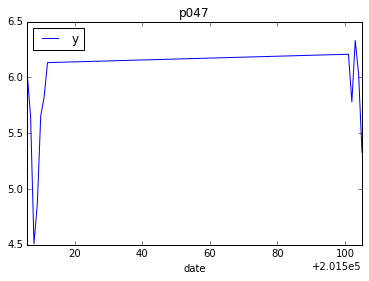

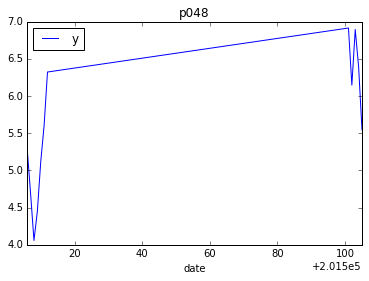

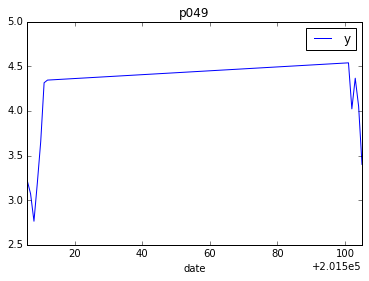

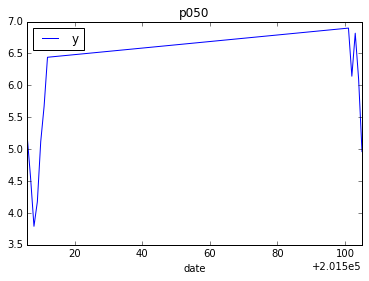

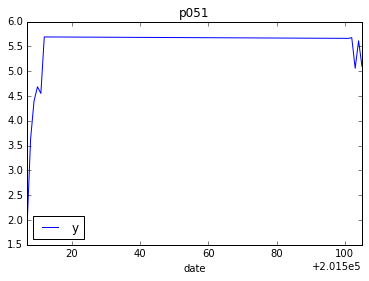

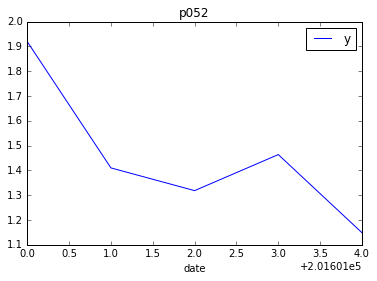

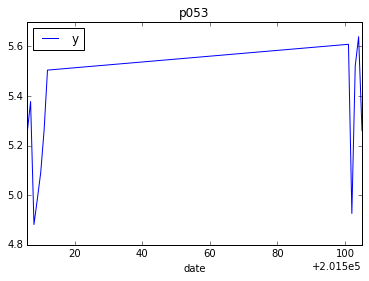

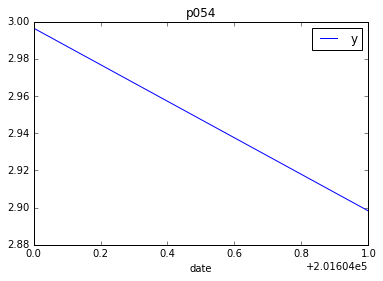

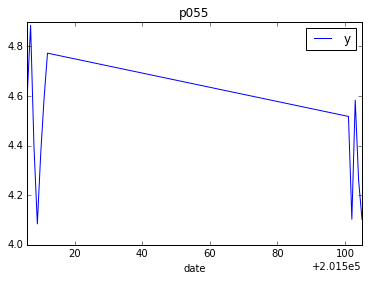

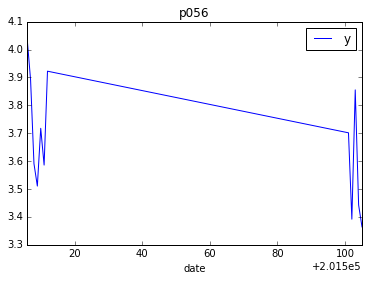

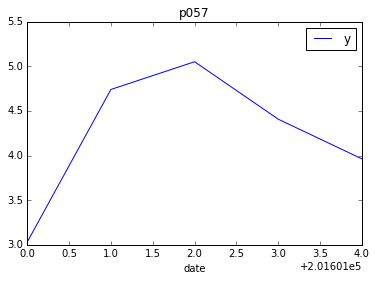

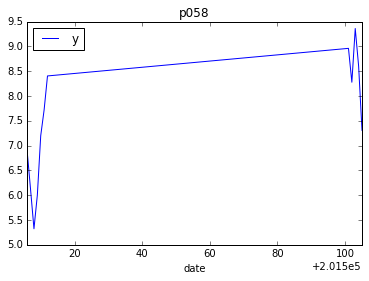

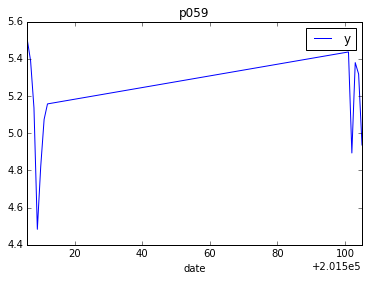

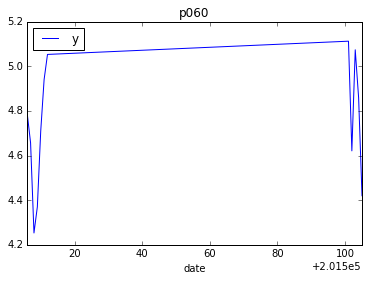

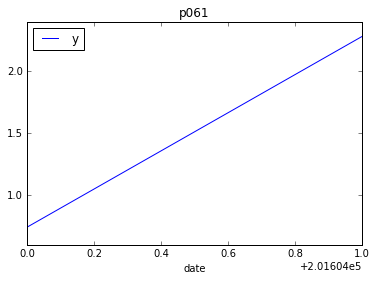

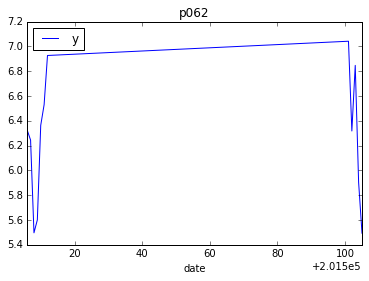

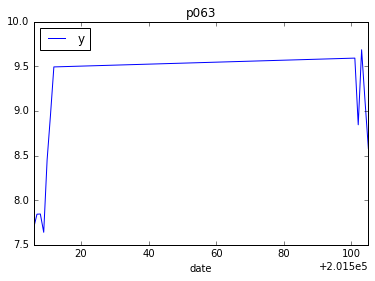

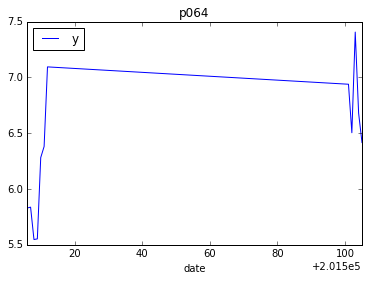

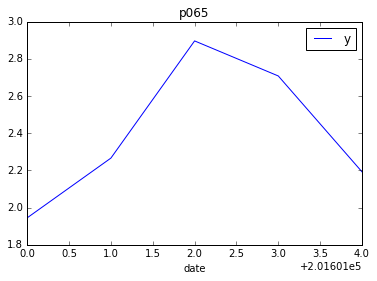

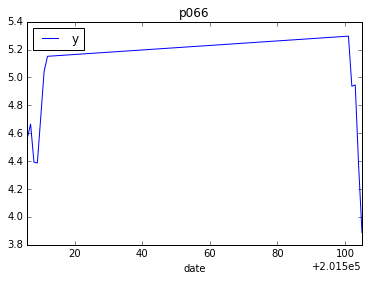

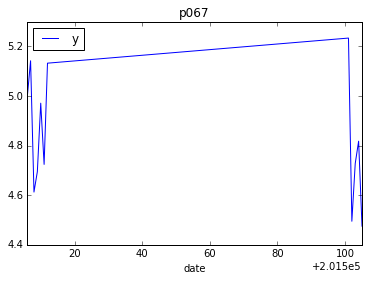

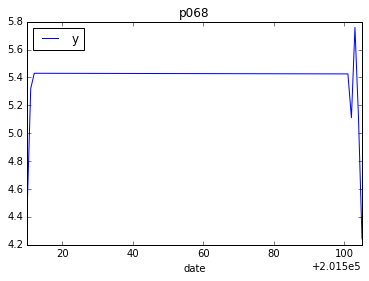

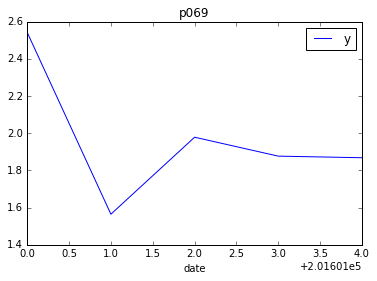

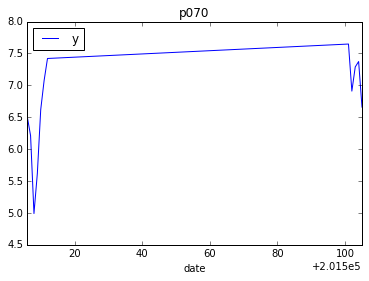

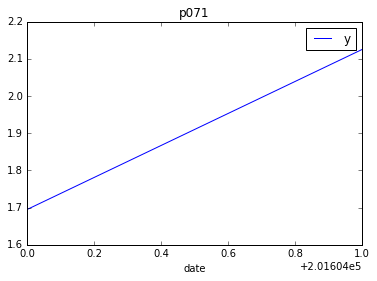

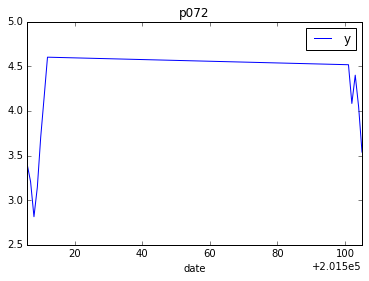

In [6]:
df_n = 'train'

for pid in pids:
    df_dict[df_n].groupby(['pid', 'date']).mean().ix[pid].plot(y='y', title=pid)

In [7]:
df_dict[df_n].groupby(['pid', 'date']).mean()

natural_lawson_store         y
pid  date                                  
p000 201506              0.088235  2.328235
     201507              0.088235  2.110356
     201508              0.088235  2.143821
     201509              0.088235  1.976485
     201510              0.088235  1.934529
     201511              0.088235  1.944553
     201512              0.088235  1.849556
     201601              0.088235  2.018259
     201602              0.088235  1.708094
     201603              0.088235  2.085859
     201604              0.088235  1.982776
     201605              0.088235  1.979894
p001 201510              0.085714  3.641183
     201511              0.085714  4.268649
     201512              0.085714  4.124220
     201601              0.085714  4.029014
     201602              0.085714  3.774391
     201603              0.088235  3.995662
     201604              0.085714  3.979491
     201605              0.085714  3.663703
p002 201506              0.090909  2.547600
     201507              0.090909  2.494688
     201508              0.090909  1.996764
     201509              0.090909  2.020915
     201510              0.090909  2.109776
     201511              0.093750  2.084000
     201512              0.090909  1.974670
     201601              0.090909  2.021015
     201602              0.090909  2.056133
     201603              0.090909  2.091848
...                           ...       ...
p069 201602              0.000000  1.564553
     201603              0.000000  1.978420
     201604              0.000000  1.876643
     201605              0.000000  1.868137
p070 201506              0.085714  6.515363
     201507              0.085714  6.210557
     201508              0.085714  4.990063
     201509              0.085714  5.619157
     201510              0.085714  6.620109
     201511              0.058824  7.075297
     201512              0.058824  7.421644
     201601              0.058824  7.648138
     201602              0.058824  6.910071
     201603              0.000000  7.288578
     201604              0.000000  7.374119
     201605              0.000000  6.658553
p071 201604              0.000000  1.695077
     201605              0.000000  2.124976
p072 201506              0.058824  3.400556
     201507              0.058824  3.206338
     201508              0.058824  2.814644
     201509              0.058824  3.146500
     201510              0.058824  3.708444
     201511              0.030303  4.149548
     201512              0.030303  4.601418
     201601              0.030303  4.516994
     201602              0.000000  4.083113
     201603              0.000000  4.399756
     201604              0.000000  4.045566
     201605              0.000000  3.538413

[689 rows x 2 columns]

In [39]:
pt = df_dict[df_n][(df_dict[df_n].area == '関東')&(df_dict[df_n].location == 'ビジネス立地')&(df_dict[df_n].natural_lawson_store==0)].pivot(index='date',columns='pid', values='y' )
pt

pid,p000,p001,p002,p003,p004,p005,p006,p007,p008,p009,...,p063,p064,p065,p066,p067,p068,p069,p070,p071,p072
date,,,,,,,,,,,,,,,,,,,,,
201506,2.0751,NaN,3.6383,3.2626,2.4327,3.3622,4.1849,NaN,NaN,NaN,...,5.8525,5.0468,NaN,4.0839,4.6312,NaN,NaN,4.9925,NaN,3.5344
201507,1.9033,NaN,2.9481,3.2121,4.8787,3.2144,3.6032,NaN,NaN,NaN,...,6.7912,5.0994,NaN,4.1115,4.6758,NaN,NaN,4.9191,NaN,2.9570
201508,1.9302,NaN,2.5415,2.9230,4.0925,3.4033,3.2121,NaN,NaN,NaN,...,5.3753,4.5471,NaN,3.7169,4.5688,NaN,NaN,4.4648,NaN,2.6083
201509,1.7969,NaN,2.1537,2.5743,4.0848,2.7366,1.6948,NaN,NaN,NaN,...,5.2011,5.0132,NaN,3.8270,4.4429,NaN,NaN,4.9558,NaN,3.1706
201510,1.5835,4.5939,2.2353,3.3699,3.8080,3.4850,0.5727,3.1959,NaN,NaN,...,5.7369,4.8316,NaN,4.4147,4.9338,4.4818,NaN,5.6992,NaN,3.5068
201511,1.6490,5.7011,2.0231,2.9488,3.9696,4.4320,2.2907,3.7579,NaN,NaN,...,7.4573,5.2617,NaN,4.5520,4.4052,4.8225,NaN,5.9653,NaN,4.0182
201512,1.5663,5.4018,1.8943,2.9414,3.6443,4.8510,1.7679,3.6085,NaN,NaN,...,6.5080,5.3596,NaN,5.0563,4.3989,5.6260,NaN,5.9148,NaN,4.2583
201601,1.7244,4.9643,2.1409,2.5083,3.7972,4.3556,2.1889,3.3088,NaN,NaN,...,6.7388,5.2862,2.3293,4.3317,4.4786,5.3045,2.7448,5.5477,NaN,4.1237
201602,1.8074,5.4021,2.2907,3.0607,3.7234,4.7147,2.8552,3.3090,NaN,NaN,...,6.3821,5.5265,2.7284,4.5871,4.0564,4.8518,1.8414,5.8919,NaN,3.8136


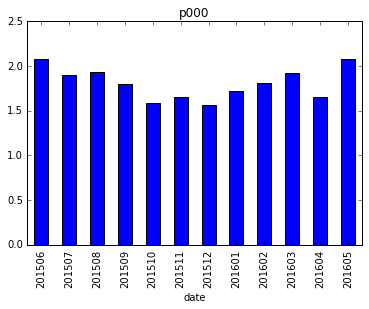

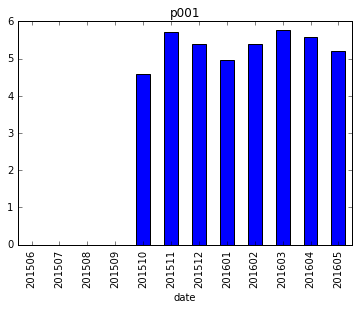

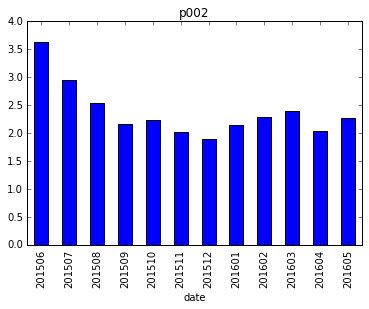

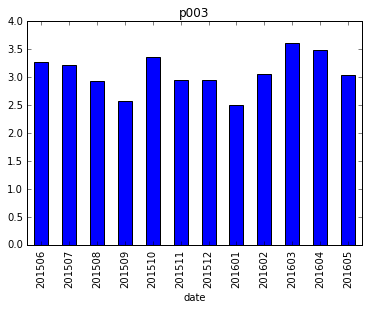

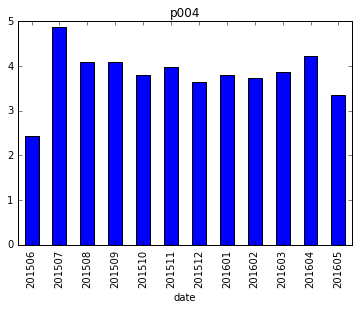

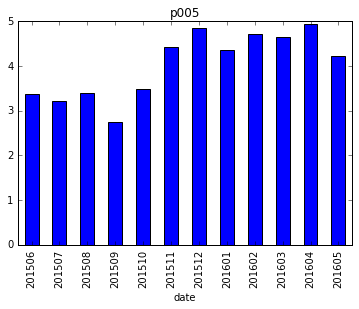

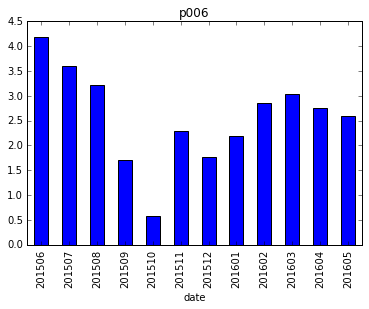

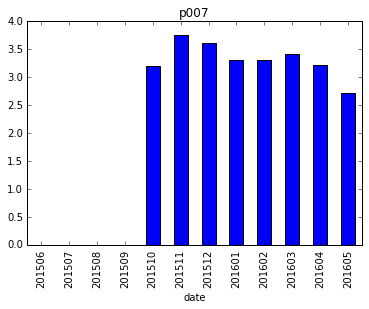

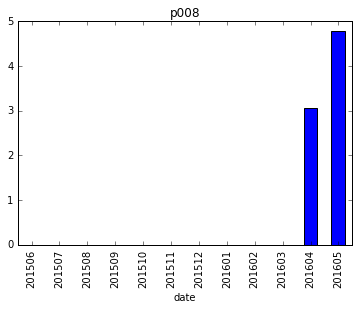

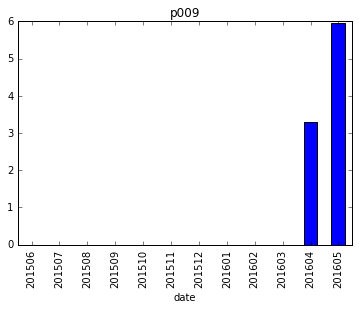

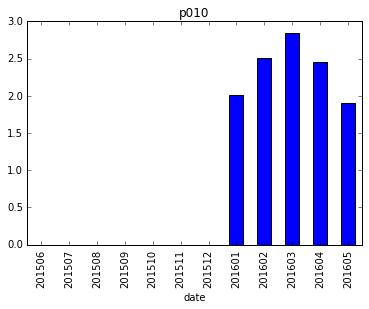

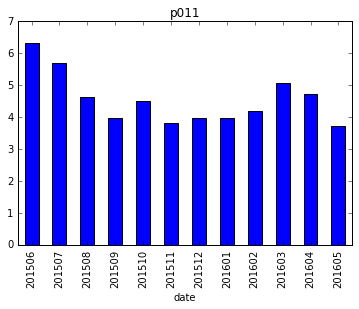

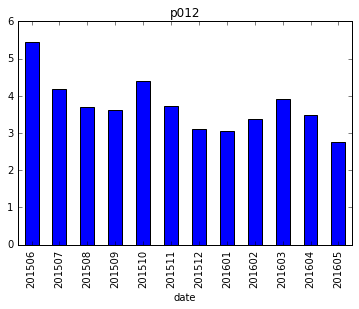

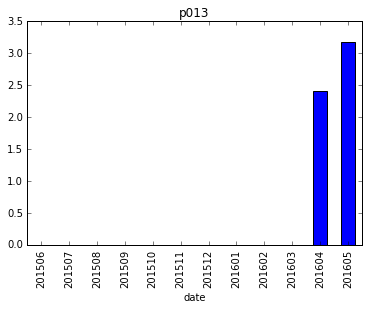

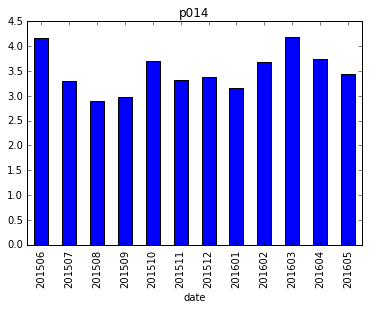

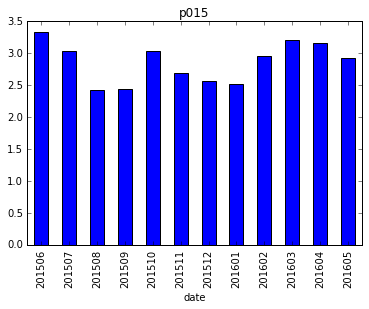

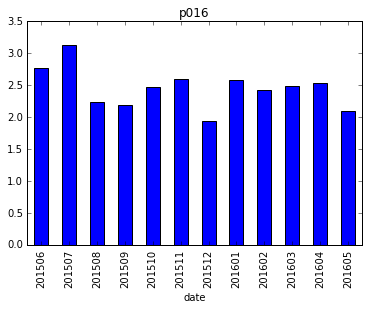

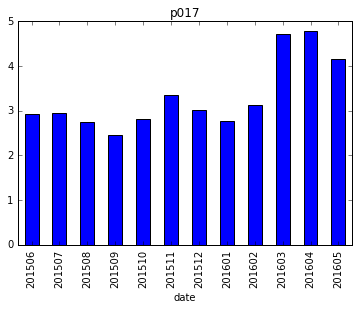

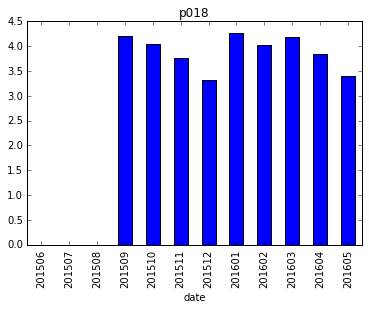

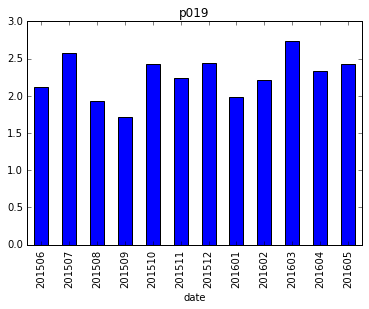

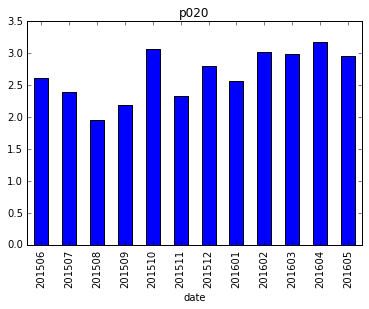

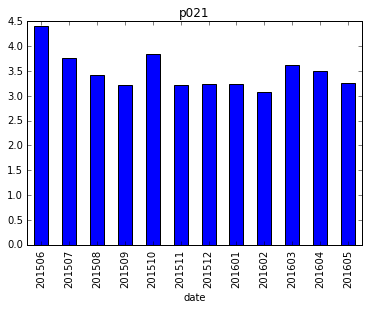

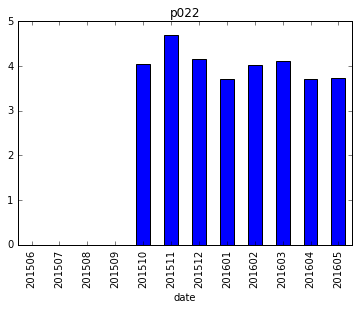

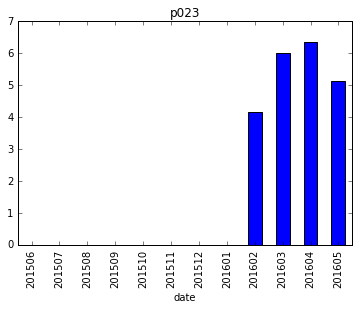

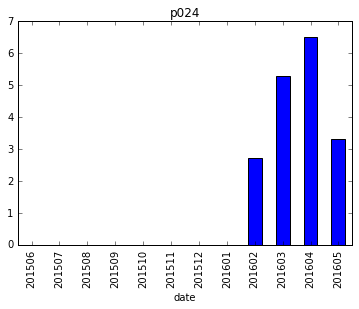

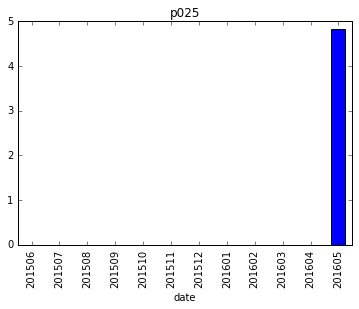

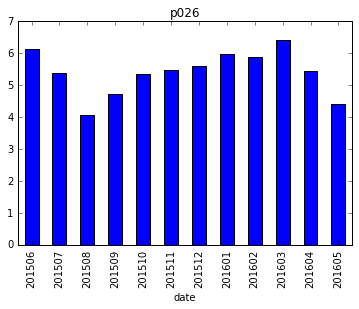

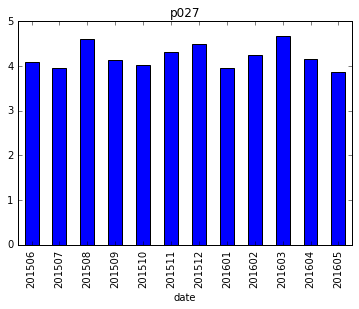

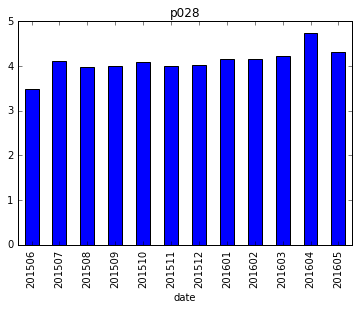

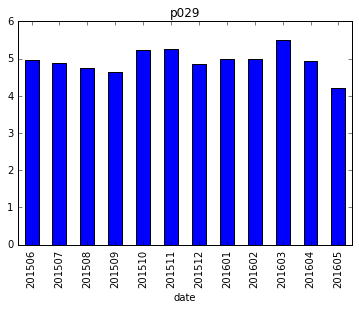

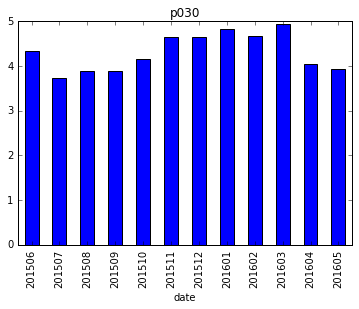

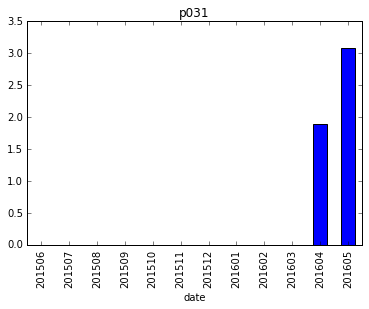

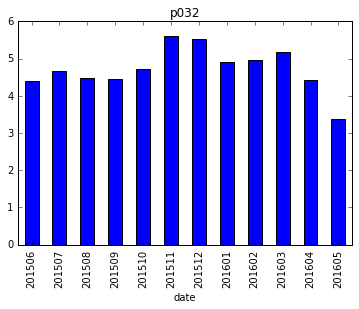

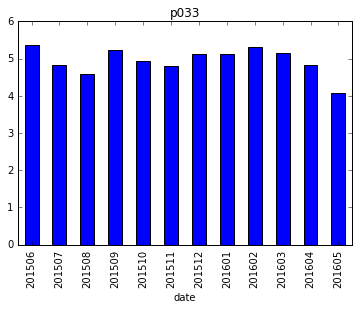

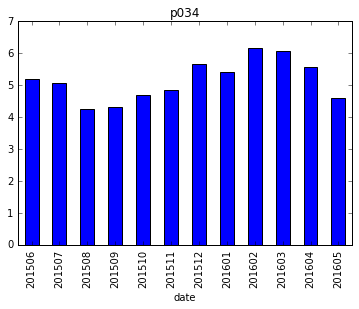

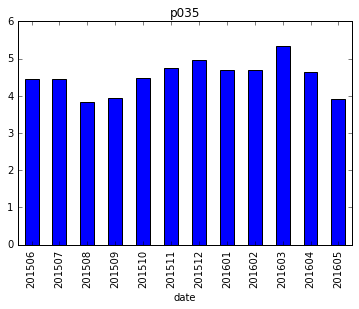

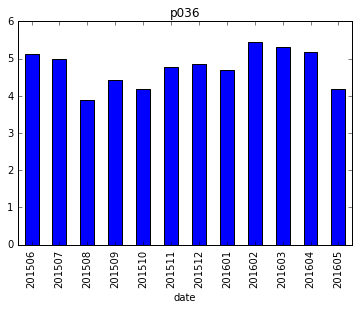

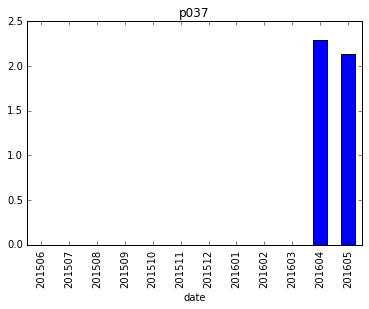

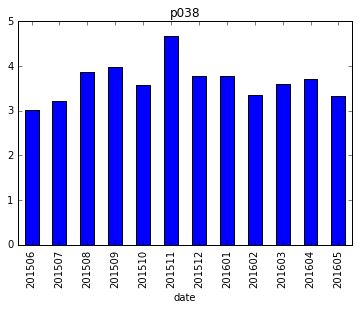

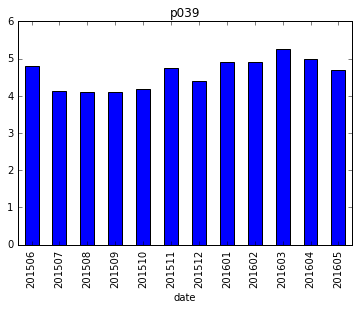

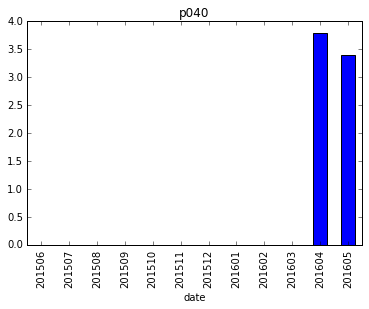

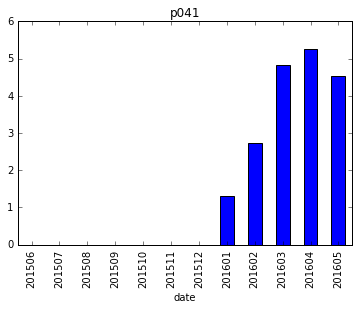

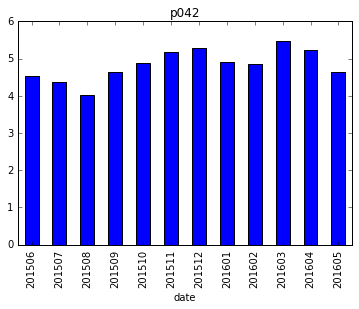

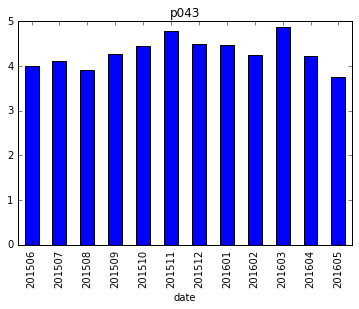

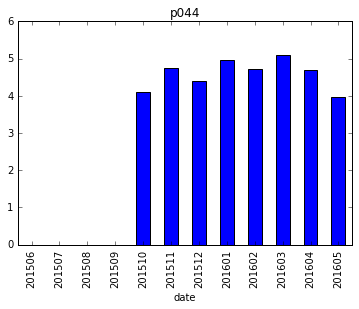

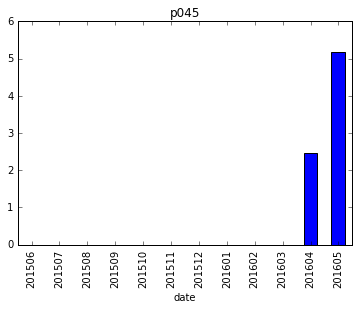

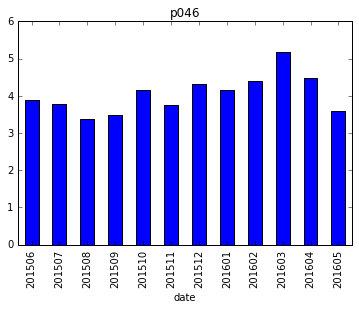

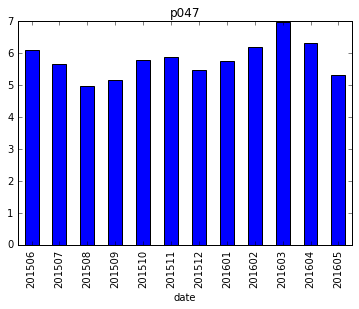

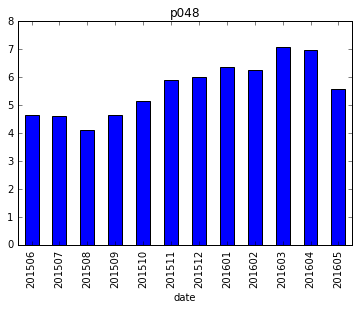

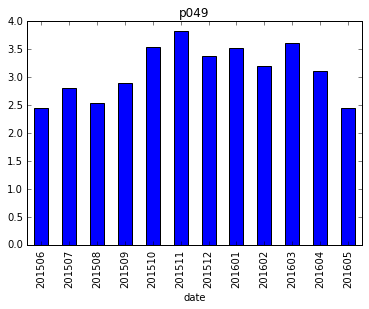

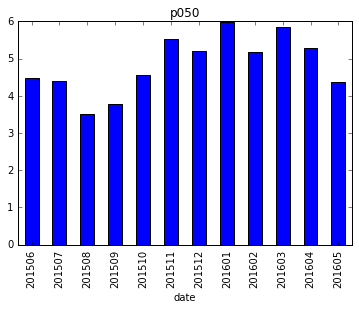

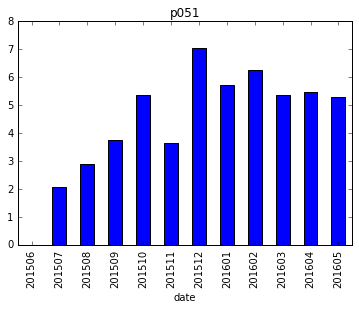

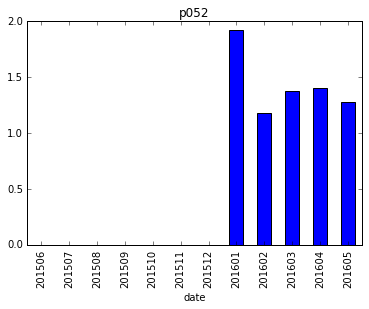

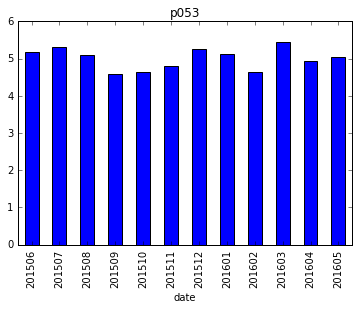

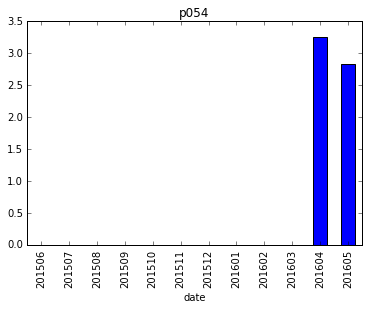

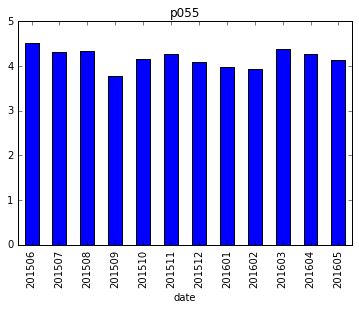

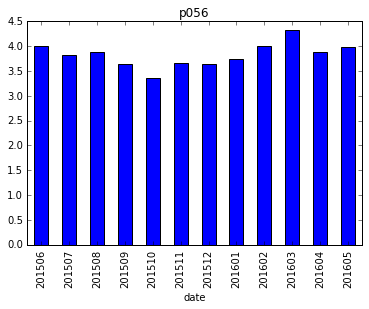

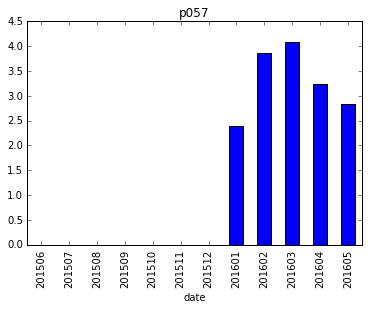

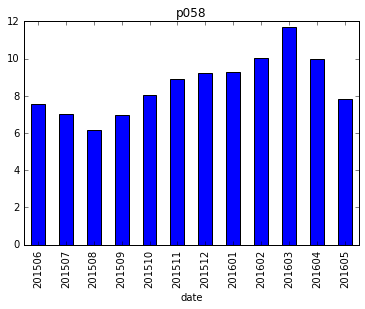

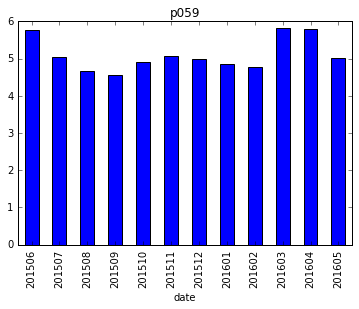

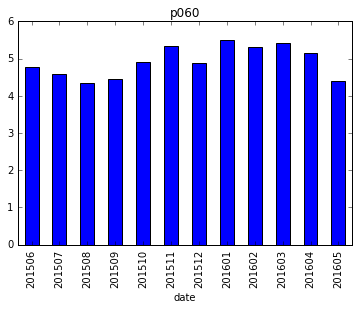

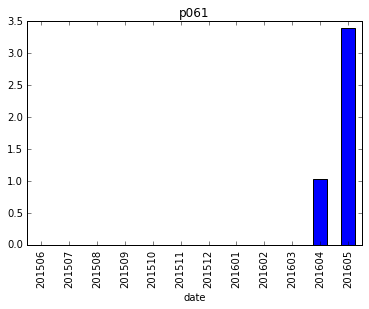

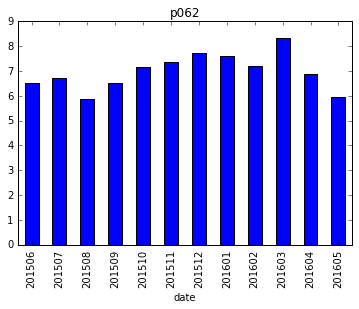

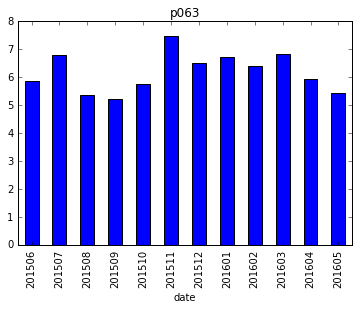

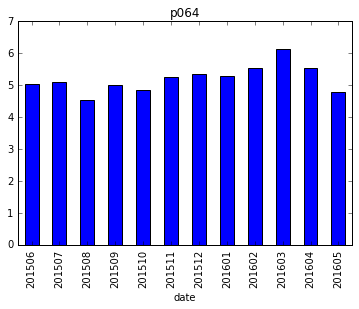

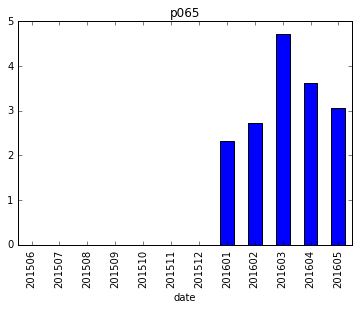

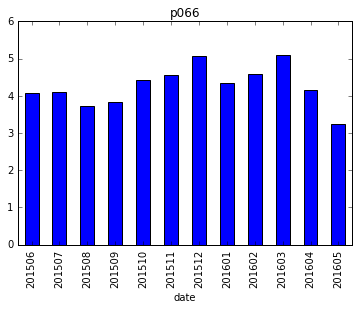

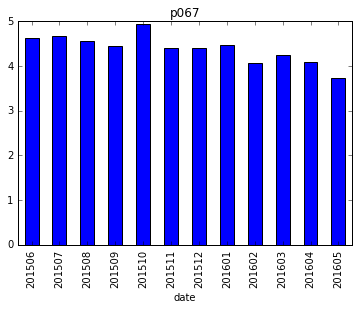

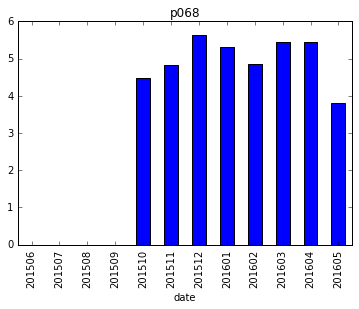

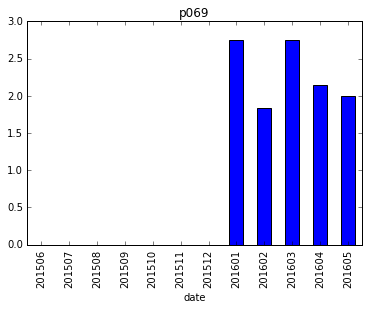

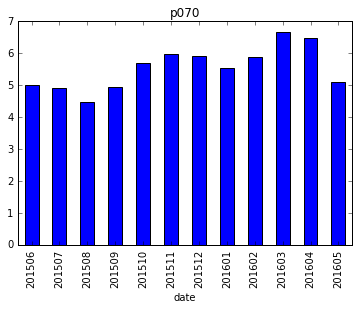

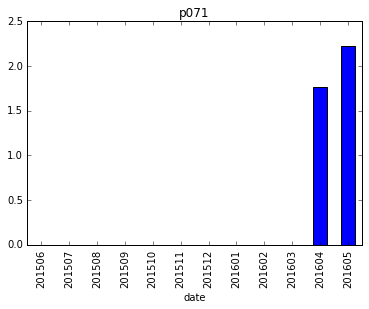

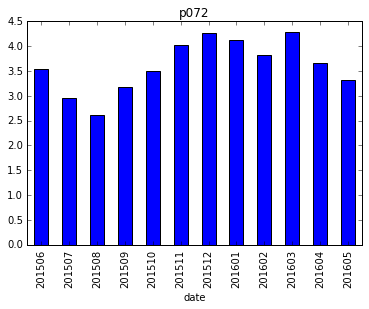

In [40]:
for pid in pids:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    pt[pid].plot(kind='bar', ax=ax, title=pid)